In [1]:
pip install heapq

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement heapq (from versions: none)
ERROR: No matching distribution found for heapq

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 1.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.7 MB 2.9 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 3.1 MB/s eta 0:00:01
   --------------------- ------------------ 0.9/1.7 MB 3.1 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.7 MB 3.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 3.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.5/1.7 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

Distancia mas corta desde el nodo 0
Nodo: 0, Distancia: 0
Nodo: 1, Distancia: 2
Nodo: 2, Distancia: 6
Nodo: 3, Distancia: 7
Nodo: 4, Distancia: 17
Nodo: 5, Distancia: 22
Nodo: 6, Distancia: 19


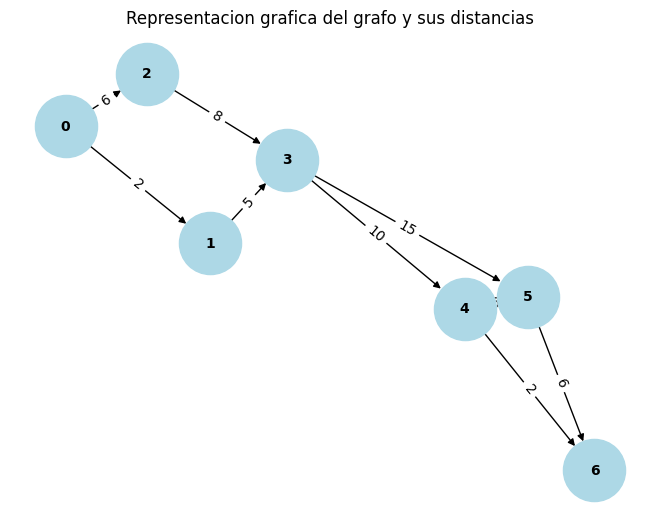

In [9]:
def dijkstra(grafo, nodo_origen):
    # Inicializar las distancias mas cortas a infinito
    distancias = { nodo: float('inf') for nodo in grafo }
    distancias[nodo_origen] = 0 # Se le indica que la distancia al nodo origen es de 0

    # Cola para determinar la exploracion de nodos
    cola_prioridad = [(0, nodo_origen)]

    # Mientras haya nodos, va a explorar
    while cola_prioridad:
        # Obtencion del nodo con menor distancia, por 1 vez sabemos que es de 0
        distancia_actual, nodo_actual = heapq.heappop(cola_prioridad)

        # Si la distancia actual es mayor a la requerida, continue
        if distancia_actual > distancias[nodo_actual]:
            continue

        # Explorar los vecinos del nodo actual (cercanos)
        for vecino, peso in grafo[nodo_actual].items():
            # Calcular la distancia al vecino a traves del nodo actual
            nueva_distancia = distancia_actual + peso

            # Si la nueva distancia es menor que la registrada, actualizar
            if nueva_distancia < distancias[vecino]:
                distancias[vecino] = nueva_distancia
                # Agregar el vecino a la cola de prioridad
                heapq.heappush(cola_prioridad, (nueva_distancia, vecino))
    return distancias

def graficar_grafo(grafo):
    # Instancia de la clase para graficar los nodos
    GrafoX = nx.DiGraph()

    # Añadir los nodos y las aristas con pesos
    for nodo, vecinos in grafo.items():
        for vecino, peso in vecinos.items():
            GrafoX.add_edge(nodo, vecino, weight=peso)
    
    # Graficar las posiciones para la grafica
    pos = nx.spring_layout(GrafoX)

    # Dibujar los nodos y las etiquetas
    nx.draw(GrafoX, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_size=10, font_weight='bold')
    # Dibujar las etiquetas de las aristas (pesos)
    labels = nx.get_edge_attributes(GrafoX, 'weight')
    nx.draw_networkx_edge_labels(GrafoX, pos, edge_labels=labels, font_size=10)

    # Mostrar la grafica
    plt.title("Representacion grafica del grafo y sus distancias")
    plt.show

grafo = {
    '0':{'1':2, '2':6},
    '1':{'3':5},
    '2':{'3':8},
    '3':{'5':15, '4':10},
    '4':{'5':6, '6':2},
    '5':{'6':6},
    '6':{},
}

# Ejecucion del alg Dijkstra
resultado = dijkstra(grafo, '0')
# Recorrido de la lista resultado
print("Distancia mas corta desde el nodo 0")
for nodo, distancia in resultado.items():
    print(f"Nodo: {nodo}, Distancia: {distancia}")

# Grafica
graficar_grafo(grafo)